In [1]:
import numpy as np
import glob
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline
import re
import scipy.stats

In [2]:
# n2n: 2-dimensional search
inputDirs = {'admm': '../../train/recon/n2n_2d/admm/encoder_decoder/'}
inputSlices = [2, 16, 26, 54, 55, 73, 75, 86, 93, 95]

In [3]:
paramList = {}
rmseList = {}
ssimList = {}
for k in inputDirs:
    subDirs = glob.glob(os.path.join(inputDirs[k], '*'))
    
    params = []
    rmses = []
    ssims = []
    
    for subDir in subDirs:
        try:
            token = os.path.basename(subDir).split('_')
            gamma = float(token[0])
            sigma = float(token[1])
        except:
            continue
            
        params.append([gamma, sigma])
        for inputSlice in inputSlices:
            rmse = np.load(os.path.join(subDir, str(inputSlice), 'loss.npz'))['val'][-1,-1]
            rmses.append(rmse)
            
#             ssim = np.load(os.path.join(subDir, str(inputSlice), 'ssim.npy'))
#             ssims.append(ssim)
    
    params = np.array(params)
    rmses = np.reshape(np.array(rmses), (params.shape[0],-1))
#     ssims = np.reshape(np.array(ssims), (params.shape[0],-1))

    paramList[k] = params
    rmseList[k] = np.mean(rmses,-1)
#     ssimList[k] = np.mean(ssims,-1)

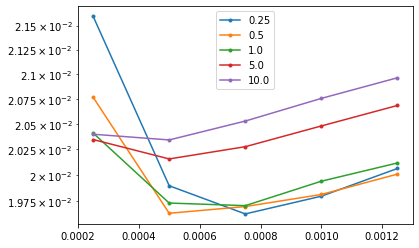

In [4]:
plt.figure()
sigmas = np.unique(paramList['admm'][:, 1])
for sigma in sigmas:
    inds = np.where(paramList['admm'][:, 1] == sigma)[0]
    gammas = params[inds, 0]
    inds2 = np.argsort(gammas)
    gammas = gammas[inds2]
    rmses = rmseList['admm'][inds][inds2]
    
    plt.semilogy(gammas, rmses, '.-')

plt.legend(sigmas)
# plt.ylim([1.5e-2, 3e-2])